# Linear Regression

In this example we are going to explore the _Boston Housing_ dataset

In [1]:
%pylab inline
import pandas as pd
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = datasets.load_boston()

In [3]:
# For datasets that come pre-loaded in scikit-learn, we can get a dataset description like so...
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Let's load this dataset into a pandas dataframe for data exploration

In [4]:
# Adding feature values to the dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['PRICE'] = data.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Run some basic stats or create some data visualizations here

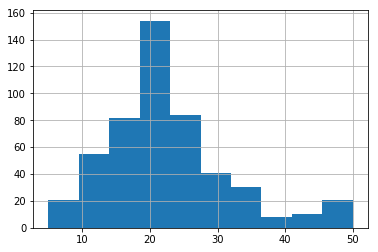

In [8]:
df.PRICE.hist();

### Now let's train a linear regression to predict house prices

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### We can start by shuffling the rows of our dataset and selecting 90% of our data for training the regression

In [10]:
# Here is a cute way to shuffle rows in pandas
# Run these steps separately and take a look at the output so you can see what is happening
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79,36.0
1,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5
2,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
3,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
4,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4


In [12]:
df.shape

(506, 14)

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

## Next:

### (1) Fit logistic regression to our train data (X_train, y_train) -- We'll use a single feature to keep things simple

### (2) Use that function to generate predictions for y_test

### (3) Evaluate those predictions

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [14]:
# Separate dataset into train/test
# For this particular example, we are using the DIS feature
X_train = df.DIS[:400].values.reshape(400,1)
y_train = df.PRICE[:400]

X_test = df.DIS[400:].values.reshape(df.shape[0]-400,1)
y_test = df.PRICE[400:]

In [15]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

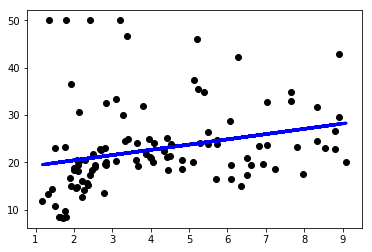

In [17]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

#### Can we easily plot the real vs predicted points in the scatterplot above?

In [18]:
regr.intercept_

18.231762228087202

In [19]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 81.19


## Now let's test with other features